In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.load('assignment9_X.npy')  ## t x n training inputs, t inputs each with n points
Y = np.load('assignment9_Y.npy')

In [3]:
X = X.T
X.shape, Y.shape

((50, 10), (50,))

In [4]:
X[0]

array([10.61071551,  0.47568071,  1.2923249 ,  0.88336179, -0.53028124,
        1.97829927,  1.10193059,  1.55633219,  1.1769877 , -0.82006401])

In [5]:
Y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9], dtype=int32)

### variables

In [6]:
t = 50
n = 10

k = 10 #number of classes

delta = 1 #to set margin value

steps = 500
alpha = 0.01

### functions

In [7]:
def sum_L_gradients(W, X, Y):
    all_matrices = []
    for i in range(t):
        matrix = np.zeros((k,n))
        yi = Y[i]
        
        matrix[yi] = gradient_L(W, X, Y, i)
        all_matrices.append(matrix)
        
    return sum(all_matrices)

def gradient_L(W, X, Y, i):
    s = 0
    for j in range(n):
        if j == Y[i]:
            continue
        if (W[j].dot(X[i]) - W[Y[i]].dot(X[i]) + delta) > 0:
            term = 1
        else:
            term = 0
        s += term
    return -(s) * X[i]

def loss(W, X, Y):
    L = 0
    for i in range(t):    ## example i
        L_i = 0

        for j in range(k):
            Yi = Y[i]
            if j == Yi:
                continue
            L_i += max(0, W[j].dot(X[i]) - W[Y[i]].dot(X[i]) - delta)

        L += L_i
    return L

### run on data

In [8]:
W = 0.1 * np.random.randn(10,10)
#W = np.ones((10,10))

In [9]:
steps_list = []
loss_list = []

for step in range(steps):
    steps_list.append(step)
    
    W = W - alpha * sum_L_gradients(W, X, Y)
    this_loss = loss(W, X, Y)
    loss_list.append(this_loss)

### plot of all 500 steps

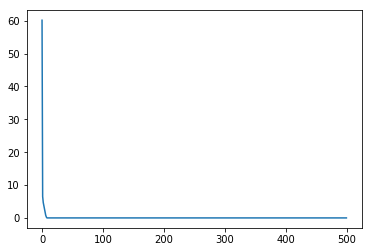

In [10]:
plt.plot(steps_list,loss_list)
plt.show()

### plot of steps until loss of 0

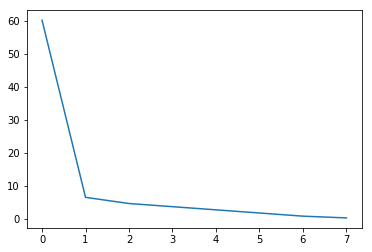

In [11]:
loss_list = [x for x in loss_list if x > 0]
steps_list = steps_list[:len(loss_list)]

plt.plot(steps_list,loss_list)
plt.show()